In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io as scio
import os
import tqdm
import seaborn as sns
import matplotlib
from tqdm import trange
import pandas as pd
import itertools
from sklearn.cluster import KMeans
import matplotlib.image as mpimg
from scipy.signal import find_peaks, peak_prominences
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error

In [6]:
from classification import classification

In [7]:
subjects = [44,45,47,48,50,54]
subjects_2 = [71,73,76,78]
HS_Blocks_1 = []
for HS in subjects:
    clean_data_path = "/public/DATA/covert_reading/"

    file_name = "HS" + str(HS) + "_Block_overt_covert.mat"
    z3 = scio.loadmat(os.path.join(clean_data_path + "/HSblockdata", file_name))
    z3 = z3["Alldata"][0][0]
    HS_Blocks_1.append(z3)

    

In [10]:
HS_Blocks_2 = []
for HS in subjects_2:
    clean_data_path =  "/public/DATA/covert_reading/"

    file_name = "HS" + str(HS) + "_Block_overt_covert.mat"
    z3 = scio.loadmat(os.path.join(clean_data_path + "/HSblockdata", file_name))
    z3 = z3["Alldata"][0][0]
    HS_Blocks_2.append(z3)

In [40]:
subjects_all = [44,45,47,48,50,54,71,73,76,78]
sig_elecs_all = {}
for HS in subjects_all:
    subject = f"HS{HS}"
    mat_path = "/public/DATA/covert_reading/HSblockdata/elecs/elec_sig"
    elec_path = mat_path + "/" + str(HS) + "sig_elecs.npy"
    sig_elecs = np.load(elec_path, allow_pickle=True).item()
    elec_all = []
    for i in sig_elecs:
        elec_all.extend(sig_elecs[i])
    sig_elecs_all[subject] = np.unique(elec_all)
for HS in subjects:
    print(sig_elecs_all[f"HS{HS}"])


[  1   2  10  11  12  16  25  26  27  30  31  45  46  47  59  60  63  65
  67  68  69  70  75  76  80  81  82  96  97  98 113 114 123 127]
[  1   4   5  12  17  18  19  20  21  22  23  24  33  34  35  36  37  38
  39  40  50  51  52  53  54  55  56  67  74  75  76  77  78  79  80  82
  86  89  91  92  95 104 105 106 110 111 112 127 131 132 133 142 144 145
 148 155 160 161 173 178 179 187 195 196 201 203 215 217 219 220 229 230
 231 233 239 240 241 244 248 249]
[  5   6   7   8  19  20  21  22  23  35  36  37  38  39  45  46  47  51
  52  53  54  55  56  57  62  63  71  72  84  87  92  95  97 121 127 129
 130 131 141 144 145 146 147 158 159 160 161 194 195 196 197 198 200 201
 202 207 209 210 211 212 213 214 215 216 217 222 223 226 227 228 229 230
 231 232 241 242 244 251]
[  0   1   5  12  14  15  18  19  28  29  30  31  42  43  44  45  46  47
  55  56  57  58  59  60  61  62  63  66  75  76  77  78  79  89  93  94
  95  99 104 108 109 110 111 112 115 118 119 120 121 122 123 124 125 12

In [41]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Generate N sets of 200-dimensional data (replace this with your own data)
N = 10
data = [np.random.rand(200) for _ in range(N)]

# Perform PCA dimensionality reduction
pca = PCA(n_components=2)  # Set the desired number of components
reduced_data = pca.fit_transform(data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Set the desired number of clusters
clusters = kmeans.fit_predict(reduced_data)

# Print the cluster assignments
print(clusters)

[2 2 2 2 1 0 1 0 2 1]


In [42]:
HS_list = [44,45,47,48,50,54,71,73,76,78]
clear_path = "/public/DATA/covert_reading/HSblockdata/"
region = classification (HS_list,clear_path)

In [43]:
region

{'44': {'postcentral': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   32,
   33,
   34,
   35,
   49,
   50,
   71,
   72,
   73,
   74,
   75,
   76,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   102,
   103,
   104,
   105,
   106,
   107,
   119,
   120],
  'precentral': [8,
   9,
   10,
   11,
   23,
   24,
   25,
   36,
   37,
   38,
   39,
   40,
   51,
   52,
   53,
   54,
   55,
   56,
   77,
   78,
   79,
   95,
   108,
   121,
   122,
   123],
  'middlefrontal': [12,
   13,
   14,
   15,
   26,
   27,
   28,
   29,
   30,
   31,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   93,
   94,
   109,
   110,
   111,
   124,
   125,
   126,
   127],
  'superiortemporal': [48, 112],
  'supramarginal': [64,
   65,
   66,
   67,
   68,
   69,
   70,
   80,
   81,
   82,
   83,
   84,
   85,
   96,
   97,
   98,
   99,
   100,
   101,
   113,
   114,
   115,
   116,
   117,
   1

In [120]:
image = []
HS_elec=[]
for i,HS in enumerate(subjects):
    if HS < 70:
        sound_list = ["ba", "bu", "da", "du", "ga", "gu"]
        forward = int(25)
        backward = int(85)
        task_list = ["overt","covert"]
    else:
        sound_list = ["ba", "da", "ga", "pa", "ta", "ka", "sa", "sha"]
        forward = int(50)
        backward = int(150)
        task_list = ["cue","overt","、covert"]
    Ecog_title = "ECoG_"
    ecog = HS_Blocks_1[i]
    if 'middlefrontal' in region[f'{HS}']:
        mf = region[f'{HS}']['middlefrontal']
    else: 
        mf = [np.nan]
    if 'postcentral' in region[f'{HS}']:
        pc=region[f'{HS}']['postcentral']
    else:
        pc=[np.nan]
    if  mf == [np.nan] and pc==[np.nan]:
        continue
    for elec in sig_elecs_all[f"HS{HS}"] :
        if elec in mf or elec in pc :
            a = []
            for task in task_list:
                if task == "overt":
                    for word in sound_list:
                        a.append(np.mean(ecog[Ecog_title + task + "_" + word][:,elec,150-forward:150+backward],axis = 0))
                    if a :
                        image.append(np.array(a))
                        HS_elec.append(f'{HS}'+'_'+f'{elec}')
        else:
            continue


In [ ]:
image = []
HS_elec=[]
for i,HS in enumerate(subjects):
    if HS < 70:
        sound_list = ["ba", "bu", "da", "du", "ga", "gu"]
        forward = int(25)
        backward = int(85)
        task_list = ["overt","covert"]
    else:
        sound_list = ["ba", "da", "ga", "pa", "ta", "ka", "sa", "sha"]
        forward = int(50)
        backward = int(150)
        task_list = ["cue","overt","、covert"]
    Ecog_title = "ECoG_"
    ecog = HS_Blocks_1[i]
    if 'middlefrontal' in region[f'{HS}']:
        mf = region[f'{HS}']['middlefrontal']
    else: 
        mf = [np.nan]
    if 'postcentral' in region[f'{HS}']:
        pc=region[f'{HS}']['postcentral']
    else:
        pc=[np.nan]
    if  mf == [np.nan] and pc==[np.nan]:
        continue
    for elec in sig_elecs_all[f"HS{HS}"] :
        if elec in mf or elec in pc :
            a = []
            for task in task_list:
                if task == "overt":
                    for word in sound_list:
                        a.append(np.mean(ecog[Ecog_title + task + "_" + word][:,elec,150-forward:150+backward],axis = 0))
                    if a :
                        image.append(np.array(a))
                        HS_elec.append(f'{HS}'+'_'+f'{elec}')
        else:
            continue


In [121]:
image_2 = []
subjects_2 = [71,73,76,78]
HS_elec_2=[]
for i,HS_2 in enumerate(subjects_2):
    if HS_2 < 70:
        sound_list = ["ba", "bu", "da", "du", "ga", "gu"]
        forward = int(25)
        backward = int(85)
        task_list = ["overt","covert"]
    else:
        sound_list = ["ba", "da", "ga", "pa", "ta", "ka", "sa", "sha"]
        forward = int(50)
        backward = int(150)
        task_list = ["cue","overt","covert"]
    Ecog_title = "ECoG_"
    ecog = HS_Blocks_2[i]
    if 'middlefrontal' in region[f'{HS_2}']:
        mf = region[f'{HS_2}']['middlefrontal']
    else: 
        mf = [np.nan]
    if 'postcentral' in region[f'{HS_2}']:
        pc=region[f'{HS_2}']['postcentral']
    else:
        pc=[np.nan]
    
    if  mf == [np.nan] and pc==[np.nan]:
        continue
    for elec in sig_elecs_all[f"HS{HS_2}"]:
        if elec in mf or elec in pc :
            b = []
            for task in task_list:
                if task == 'overt':
                    for word in sound_list:
                        b.append(np.mean(ecog[Ecog_title + task + "_" + word][:,elec,150-forward:150+backward],axis = 0))
                    if b:
                        image_2.append(np.array(b))
                        HS_elec_2.append(f'{HS_2}'+'_'+f'{elec}')
        else:
            continue

In [123]:
images=image
images_2=image_2

In [124]:
len(images)

268

In [125]:

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming you have a list of 20 images with dimensions 26x200
def zscore(z):
    return (z-np.mean(z))/np.std(z)
# Step 1: Flatten the images
flattened_images = [zscore(image.flatten())for image in images]
flattened_images_2 = [zscore(image.flatten())for image in images_2]


# Step 2: Perform PCA dimensionality reduction


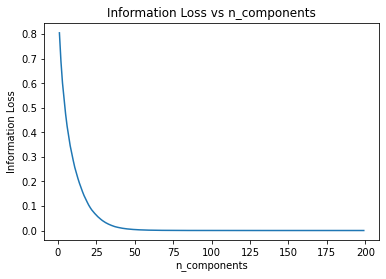

In [126]:
import numpy as np
from sklearn.decomposition import PCA
# 生成N个200维的数据集（替换为你自己的数据）

data = np.array(flattened_images)


# 定义不同的n_components
n_components = range(1, 200)

# 计算每个维度下的信息损失程度
explained_variances = []
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(data)
    explained_variances.append(1 - np.sum(pca.explained_variance_ratio_))
reduced_data = pca.fit_transform(flattened_images)
# 绘制信息损失程度和n_components的折线图
import matplotlib.pyplot as plt

plt.plot(n_components, explained_variances)
plt.xlabel('n_components')
plt.ylabel('Information Loss')
plt.title('Information Loss vs n_components')
plt.show()

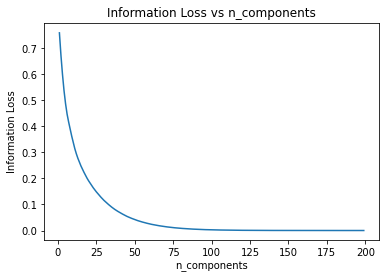

In [127]:
import numpy as np
from sklearn.decomposition import PCA
# 生成N个200维的数据集（替换为你自己的数据）

data_2 = np.array(flattened_images_2)


# 定义不同的n_components
n_components = range(1, 200)

# 计算每个维度下的信息损失程度
explained_variances_2 = []
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(data_2)
    explained_variances_2.append(1 - np.sum(pca.explained_variance_ratio_))
reduced_data_2 = pca.fit_transform(flattened_images_2)
# 绘制信息损失程度和n_components的折线图
import matplotlib.pyplot as plt

plt.plot(n_components, explained_variances_2)
plt.xlabel('n_components')
plt.ylabel('Information Loss')
plt.title('Information Loss vs n_components')
plt.show()

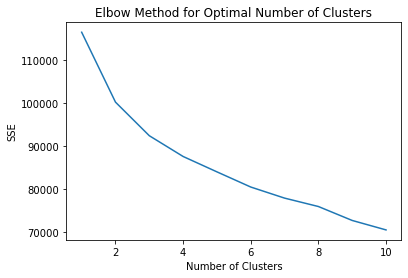

In [128]:
pca = PCA(n_components=50)  # Set the desired number of components
reduced_data = pca.fit_transform(flattened_images)

# Step 2: Determine the optimal number of clusters using the Elbow Method
sse = []
k_values = range(1, 11)  # Set the range of cluster numbers to try

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_data)
    sse.append(kmeans.inertia_)

# Step 3: Plot the SSE vs. number of clusters
plt.plot(k_values, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

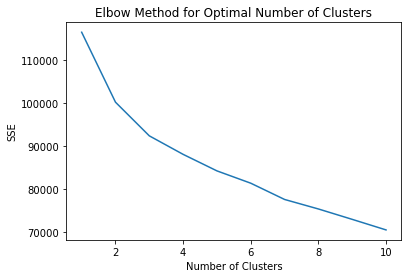

In [129]:
pca = PCA(n_components=100)  # Set the desired number of components
reduced_data_2 = pca.fit_transform(flattened_images_2)

# Step 2: Determine the optimal number of clusters using the Elbow Method
sse = []
k_values = range(1, 11)  # Set the range of cluster numbers to try

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_data)
    sse.append(kmeans.inertia_)

# Step 3: Plot the SSE vs. number of clusters
plt.plot(k_values, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [140]:
pca = PCA(n_components=50)  # Set the desired number of components
reduced_data = pca.fit_transform(flattened_images)

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Set the desired number of clusters
clusters = kmeans.fit_predict(reduced_data)

# Print the cluster assignments
print(clusters)

[1 1 0 1 1 1 0 0 1 1 0 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0
 0 1 2 1 0 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 1 1
 0 0 1 1 1 2 1 1 1 2 2 1 1 1 2 2 2 1 1 0 0 0 1 2 0 0 0 0 1 1 1 1 1 2 2 2 1
 0 0 1 1 1 2 2 1 1 1 1 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 1 2 2 2 2 2 0 0 1 1 1 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [141]:
pca_2 = PCA(n_components=100)  # Set the desired number of components
reduced_data_2 = pca.fit_transform(flattened_images_2)

# Step 3: Apply K-means clustering
kmeans_2 = KMeans(n_clusters=3)  # Set the desired number of clusters
clusters_2 = kmeans.fit_predict(reduced_data_2)

# Print the cluster assignments
print(clusters_2)

[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 2 2 1 1 2 2 2 1 1 1 2 2 2 2 1 1 1 1 1 2 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 2 2 2 2 2 2 2 1 2 0 2 2 0 2 2 0 2 2 2 2 2 2 1 1 0 2 2 2 2 2
 2 0 2 0 2 2 2 2 2 1 1 0 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2]


In [142]:
for cluster_label in range(4):
    print(len(np.where(clusters==cluster_label)[0]))

41
131
96
0


In [143]:
for cluster_label in range(4):
    print(len(np.where(clusters_2==cluster_label)[0]))

44
44
122
0


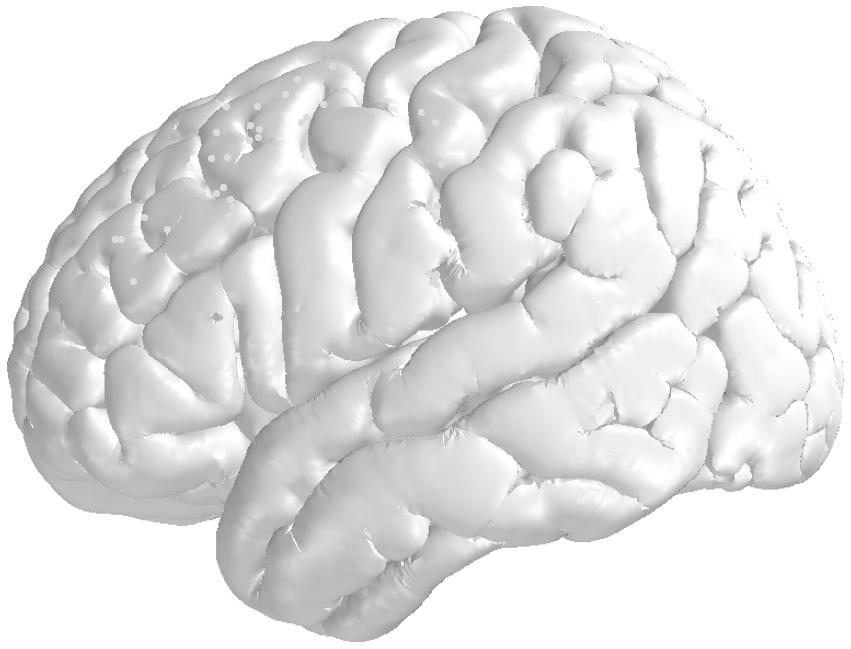

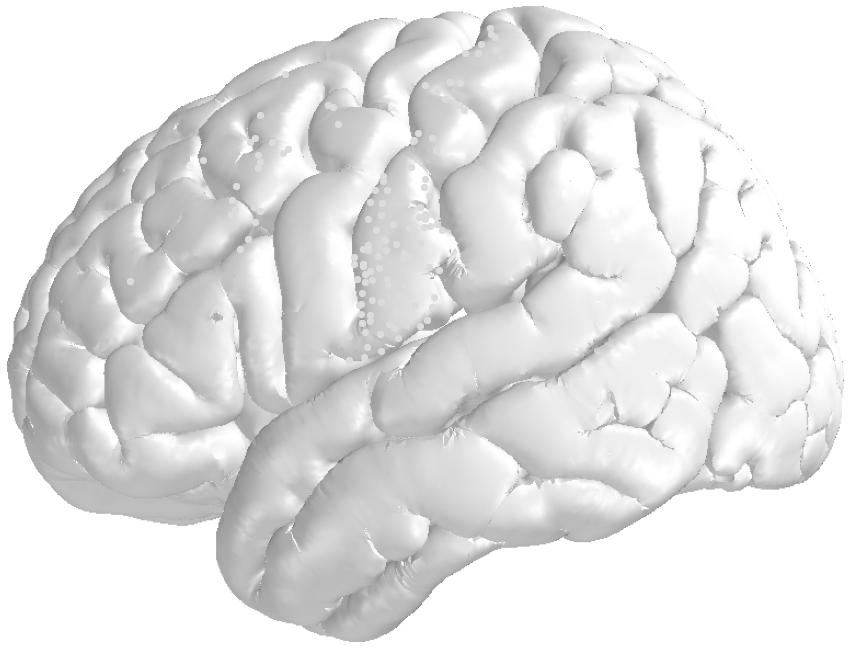

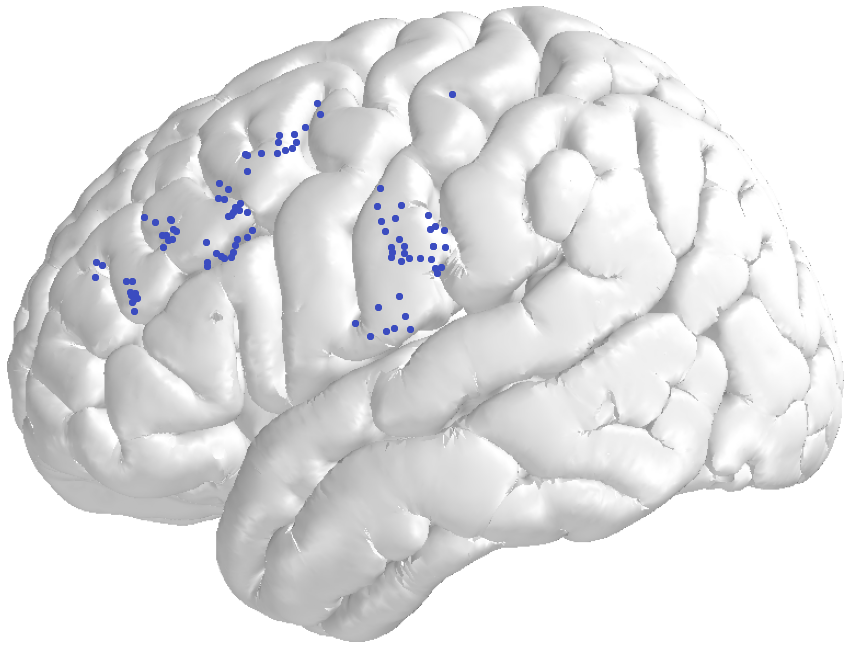

In [144]:
def plot_sig_kmean_(label):
    path = "/public/DATA/covert_reading/HSblockdata"
    img = mpimg.imread(path +"/elecs/MNI.png")
    fig, ax = plt.subplots(figsize=(15,15))
    ax.imshow(img)
    z_index = 0
    import matplotlib.cm as cm
    sm = plt.cm.ScalarMappable(cmap=cm.get_cmap('coolwarm'))
    sm.set_array([]) 
    normalized_values = clusters/max(clusters)
    colors = sm.to_rgba(normalized_values)
    for HS in subjects:

        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/warped/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        
        if HS < 70:
            sound_list = ["ba", "bu", "da", "du", "ga", "gu"]
            forward = int(25)
            backward = int(85)
            task_list = ["overt","covert"]
        else:
            sound_list = ["ba", "da", "ga", "pa", "ta", "ka", "sa", "sha"]
            forward = int(50)
            backward = int(150)
            task_list = ["cue","overt","covert"]
        
        if 'middlefrontal' in region[f'{HS}']:
            mf = region[f'{HS}']['middlefrontal']
        else: 
            mf = [np.nan]
        if 'postcentral' in region[f'{HS}']:
            pc=region[f'{HS}']['postcentral']
        else:
            pc=[np.nan]
        if  mf == [np.nan] and pc==[np.nan]:
            continue
            
        for i in range(n_chans):
            if i in sig_elecs_all[f"HS{HS}"]:
                if i in mf or i in pc:
                    if clusters[z_index] == label:
                        ax.plot(xy[i][0], xy[i][1], 'o',color = colors[clusters[z_index]],alpha = 1)
                        plt.plot(xy[i][0], xy[i][1], 'o',color = colors[clusters[z_index]],alpha = 1)
                    z_index+=1
        ax.grid('off') 
        ax.axis('off')
    
        plt.xticks([])
        plt.yticks([])
for i in range(3):
    plot_sig_kmean_(i)

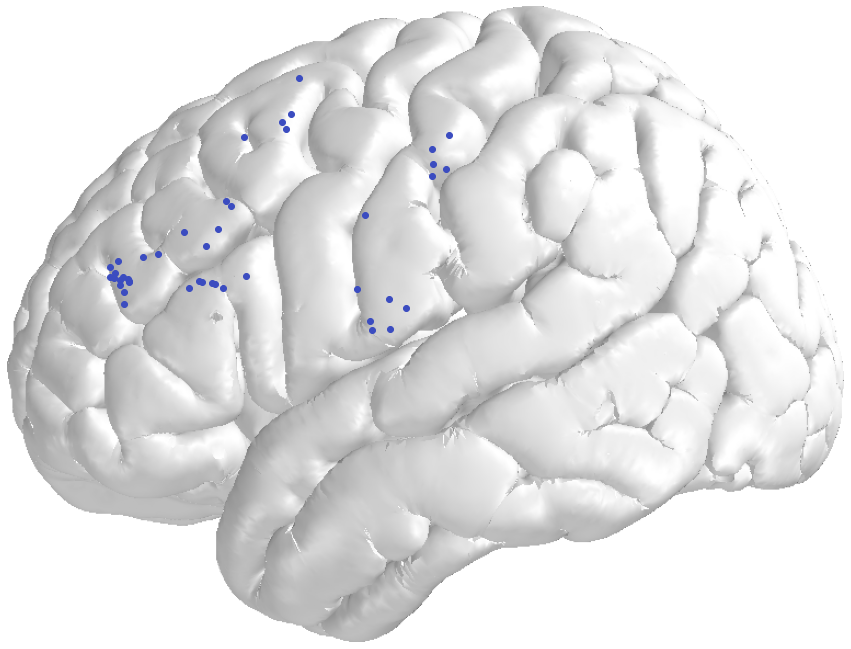

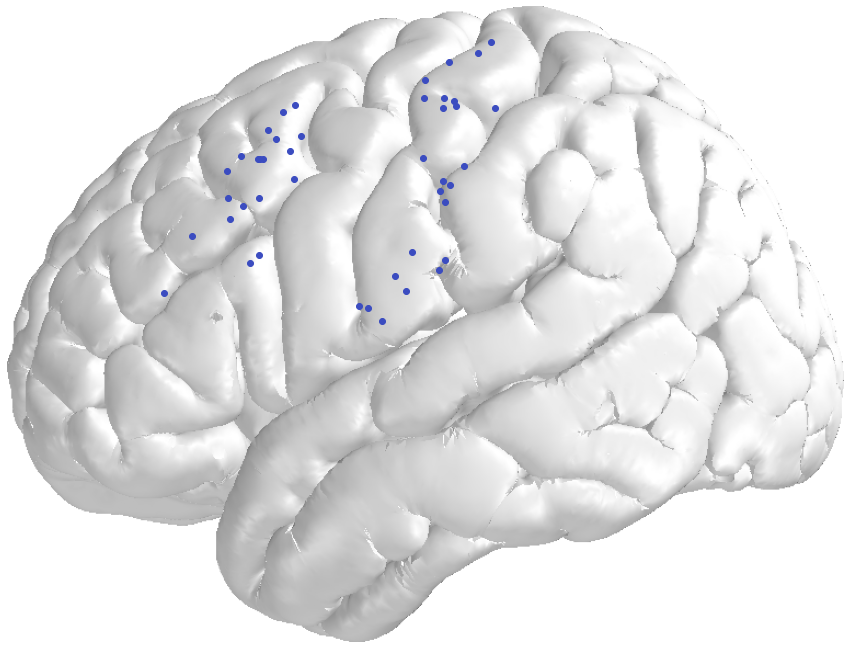

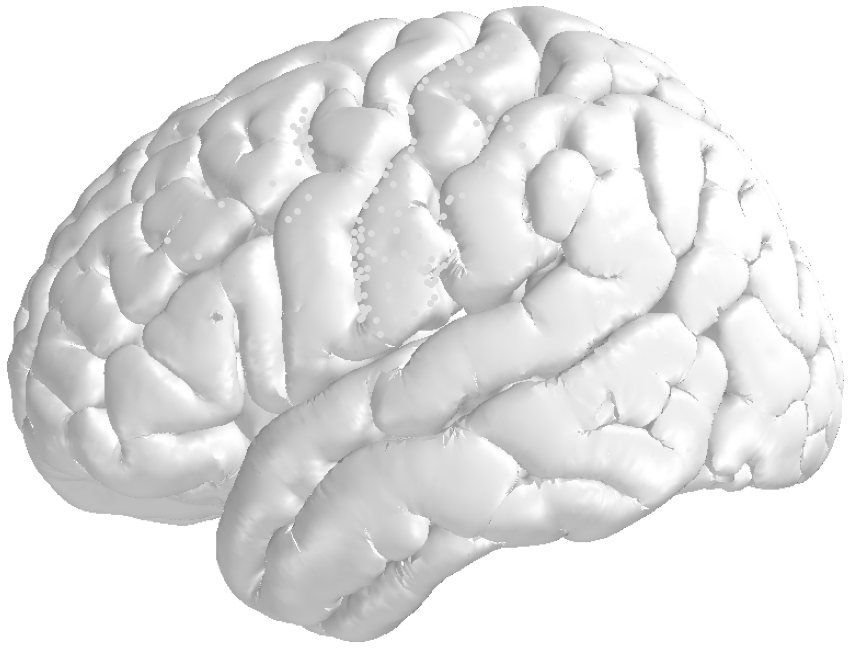

In [145]:
def plot_sig_kmean_(label):
    path = "/public/DATA/covert_reading/HSblockdata"
    img = mpimg.imread(path +"/elecs/MNI.png")
    fig, ax = plt.subplots(figsize=(15,15))
    ax.imshow(img)
    z_index_2 = 0
    import matplotlib.cm as cm
    sm = plt.cm.ScalarMappable(cmap=cm.get_cmap('coolwarm'))
    sm.set_array([]) 
    normalized_values_2 = clusters_2/max(clusters_2)
    colors = sm.to_rgba(normalized_values_2)
    for HS in subjects_2:

        subject_2 = f"HS{HS}"
        xy_2 = scio.loadmat(path +"/elecs/warped/"+ subject_2 + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy_2.shape[0] >= 256 else 128
        
        
        if HS < 70:
            sound_list = ["ba", "bu", "da", "du", "ga", "gu"]
            forward = int(25)
            backward = int(85)
            task_list = ["overt","covert"]
        else:
            sound_list = ["ba", "da", "ga", "pa", "ta", "ka", "sa", "sha"]
            forward = int(50)
            backward = int(150)
            task_list = ["cue","overt","covert"]
        
        if 'middlefrontal' in region[f'{HS}']:
            mf = region[f'{HS}']['middlefrontal']
        else: 
            mf = [np.nan]
        if 'postcentral' in region[f'{HS}']:
            pc=region[f'{HS}']['postcentral']
        else:
            pc=[np.nan]
        if  mf == [np.nan] and pc==[np.nan]:
            continue
            
        for i in range(n_chans):
            if i in mf or i in pc:
                if i in sig_elecs_all[f"HS{HS}"]:
                    if clusters_2[z_index_2] == label:
                        ax.plot(xy_2[i][0], xy_2[i][1], 'o',color = colors[clusters_2[z_index_2]],alpha = 1)
                    z_index_2+=1
                    
        ax.grid('off') 
        ax.axis('off')
    
        plt.xticks([])
        plt.yticks([])
for i in range(3):
    plot_sig_kmean_(i)

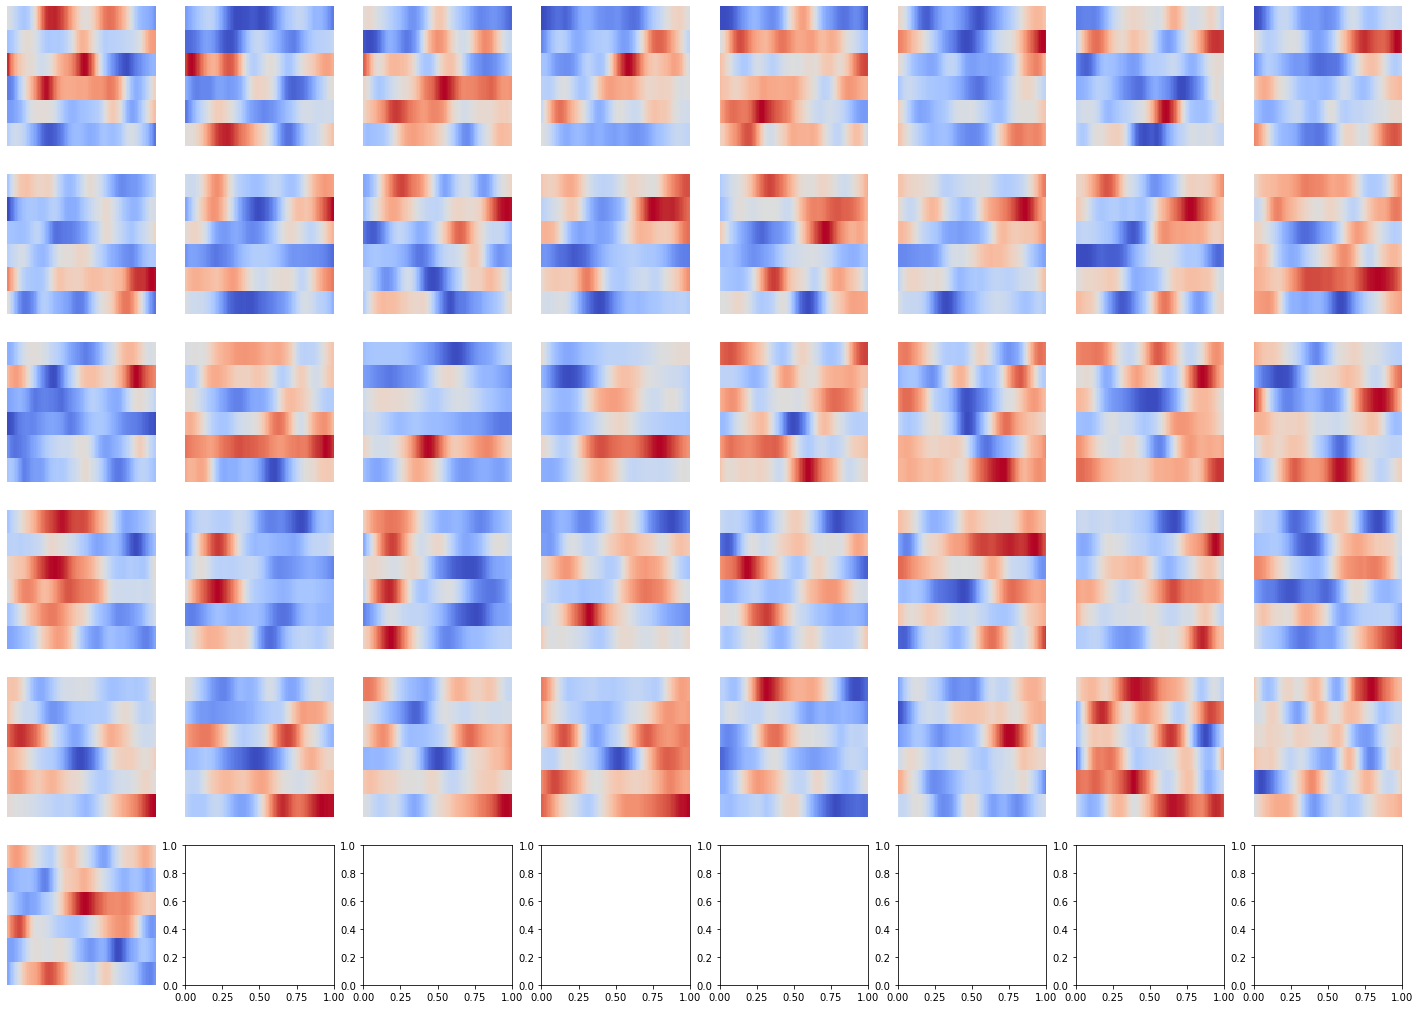

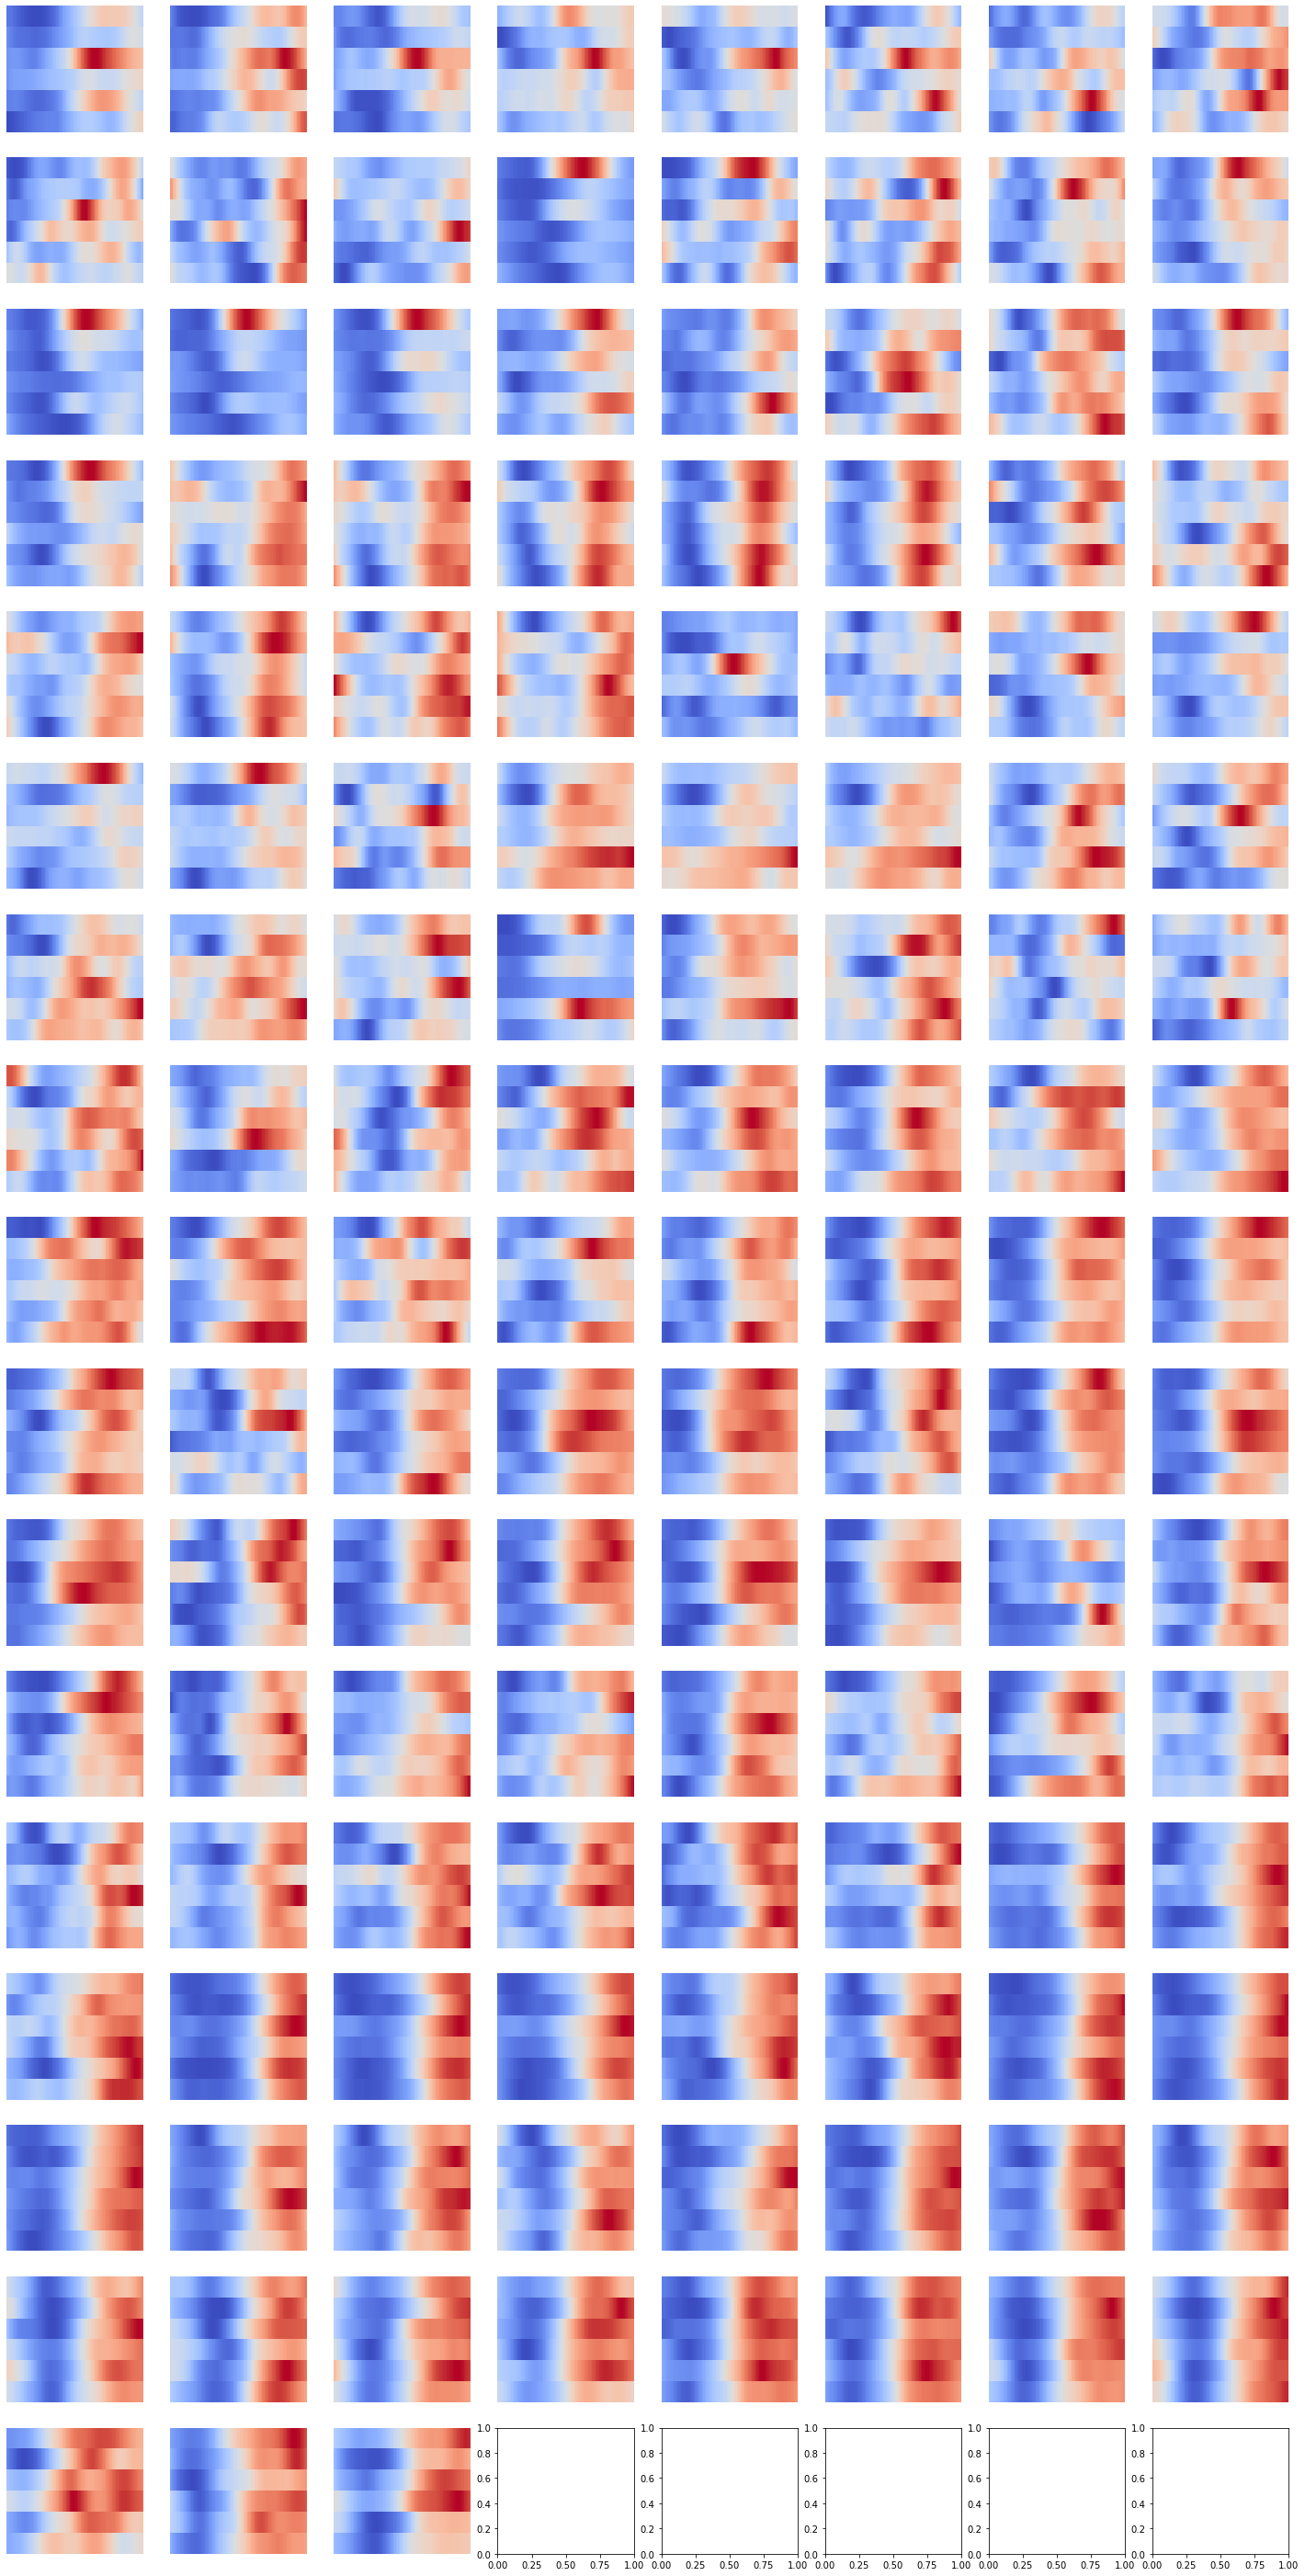

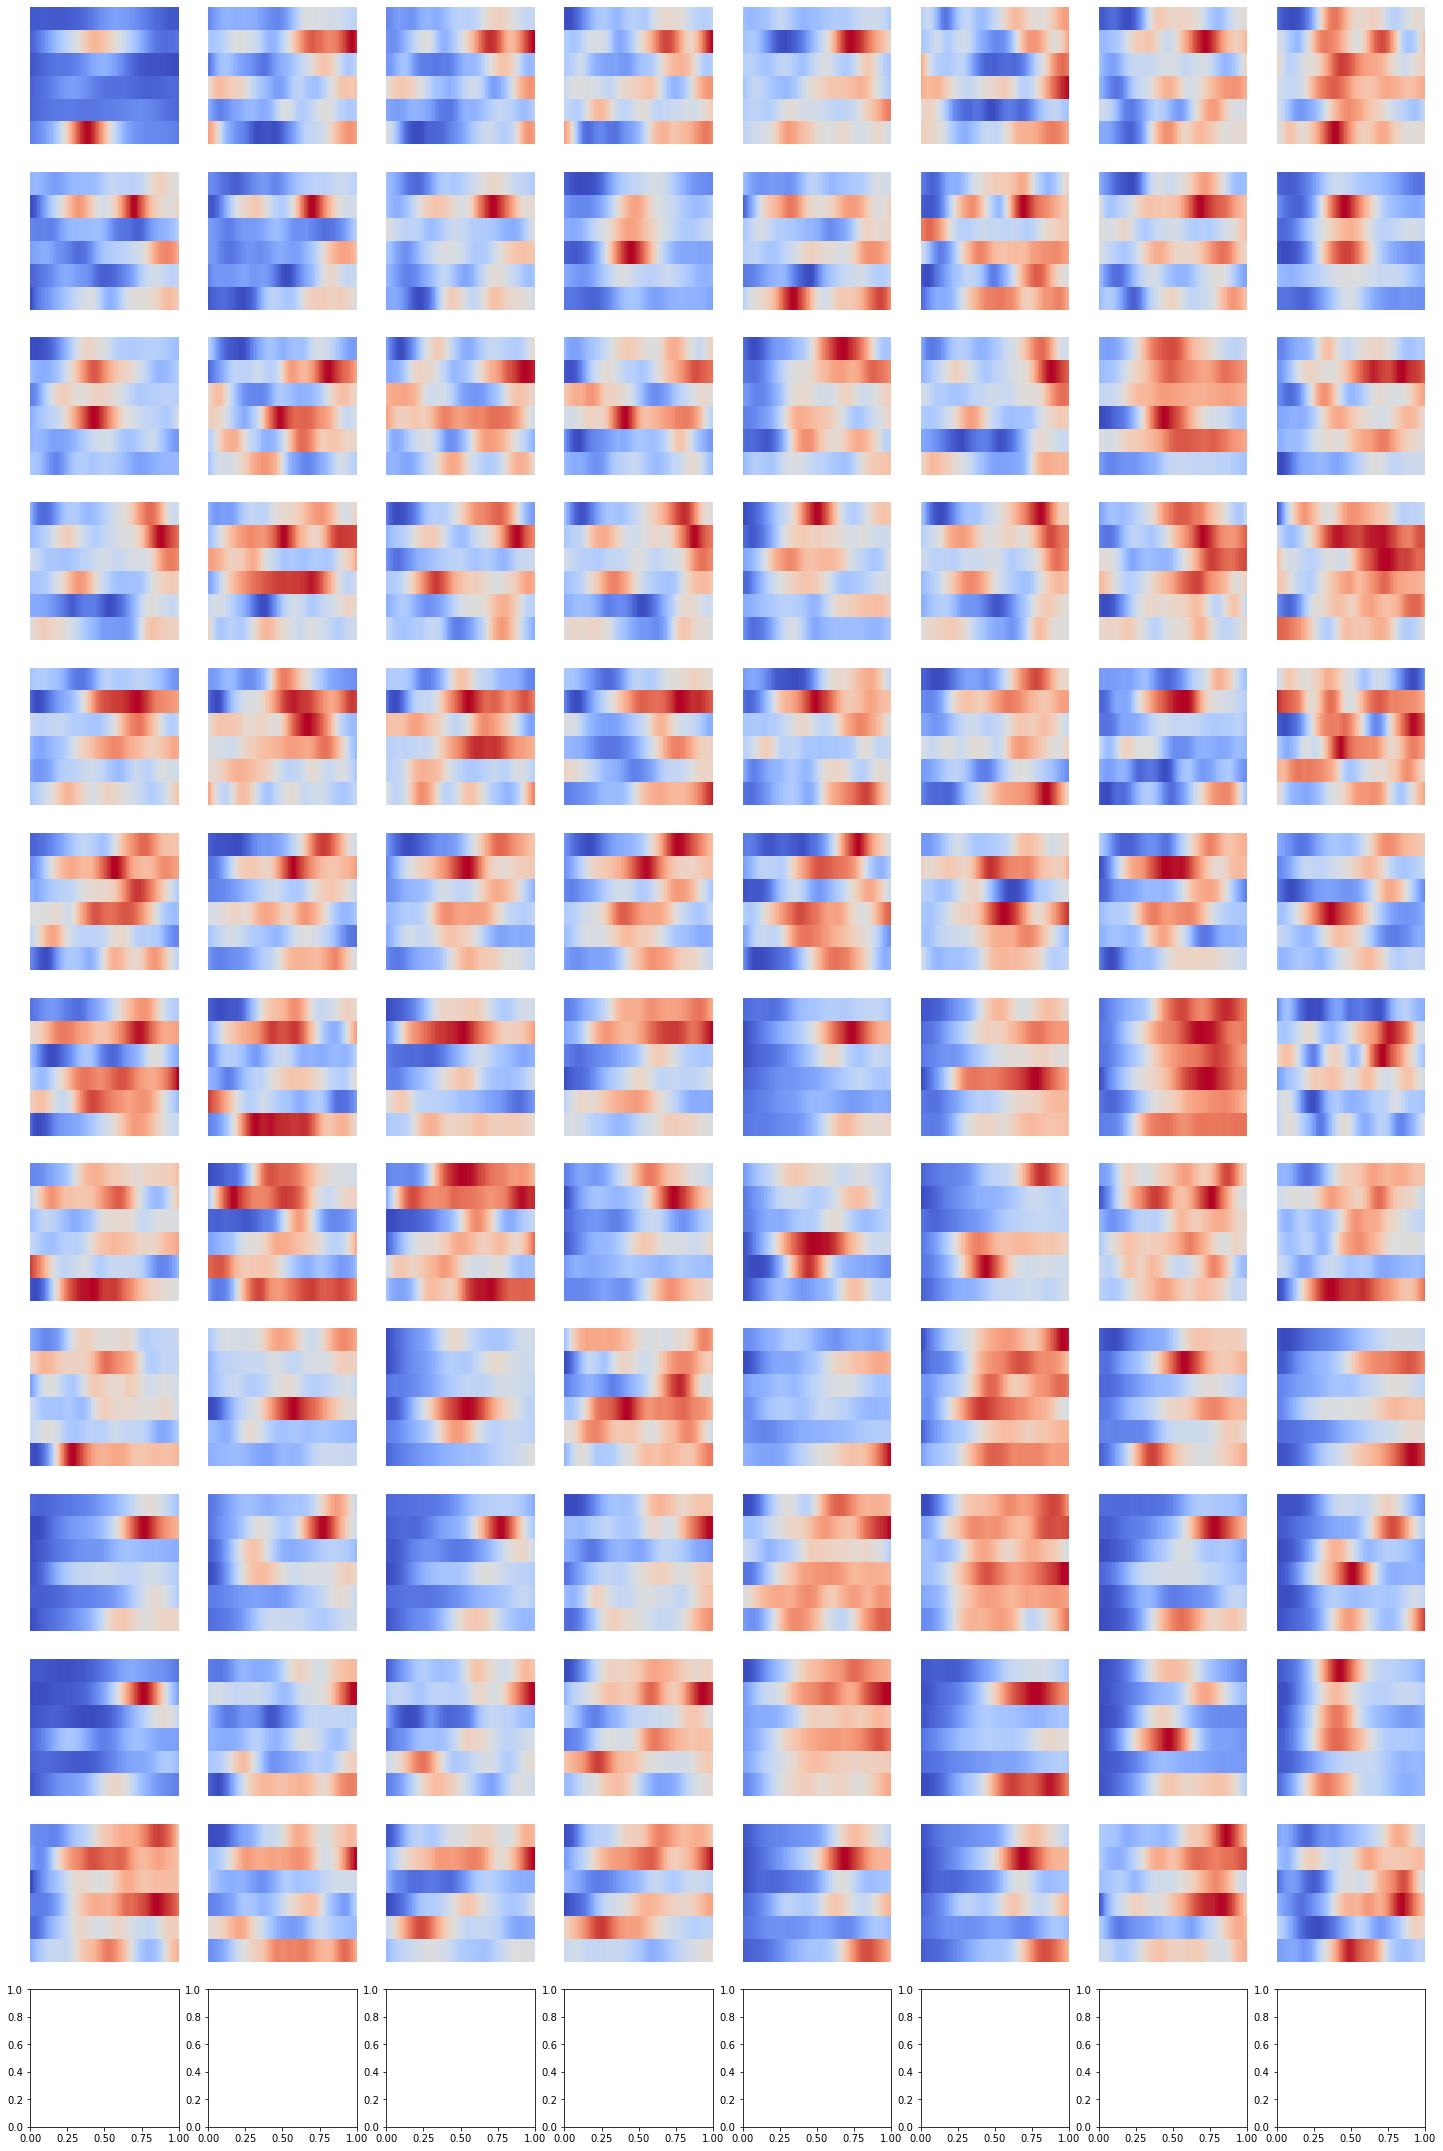

In [146]:
def plot_heatmap_kmeans(cluster_label):
    nums_plots = len(np.where(clusters==cluster_label)[0])
    fig, axs = plt.subplots(int(nums_plots/8)+1, 8, figsize=(25, int(25/8)*(1+int(nums_plots/8))))
    
    ax = 0 
    
        
    for i,img_temp in enumerate(images):
        if clusters[i] == cluster_label:
            sns.heatmap(img_temp,ax=axs.flatten()[ax],yticklabels=[],xticklabels=[],cmap='coolwarm',cbar=False)
            ax += 1
for i in range(3):
    plot_heatmap_kmeans(i)

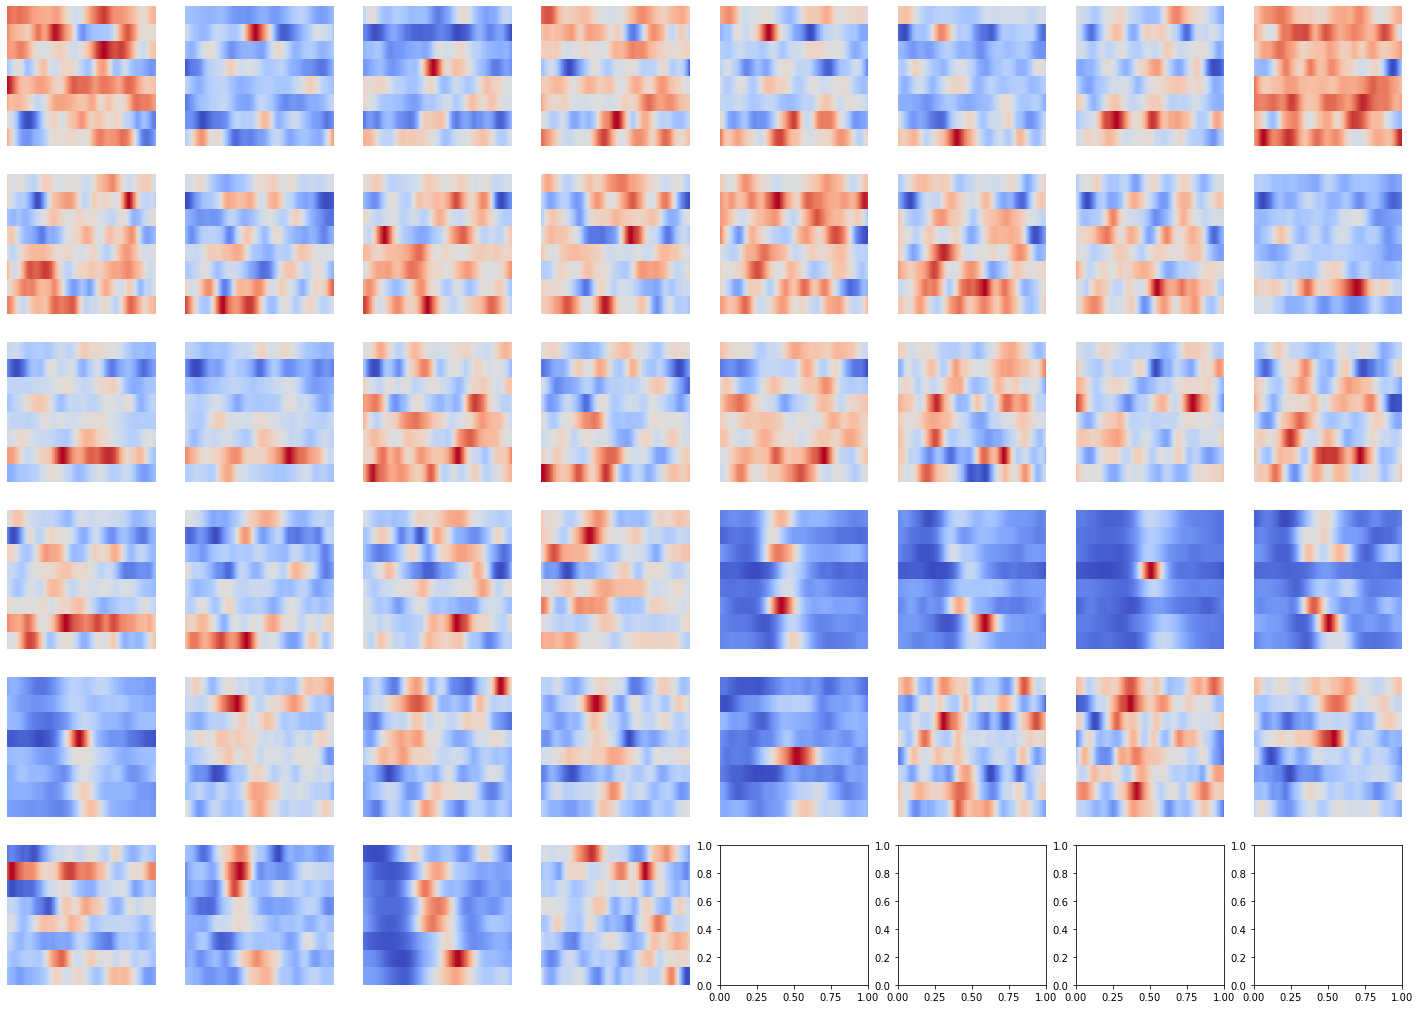

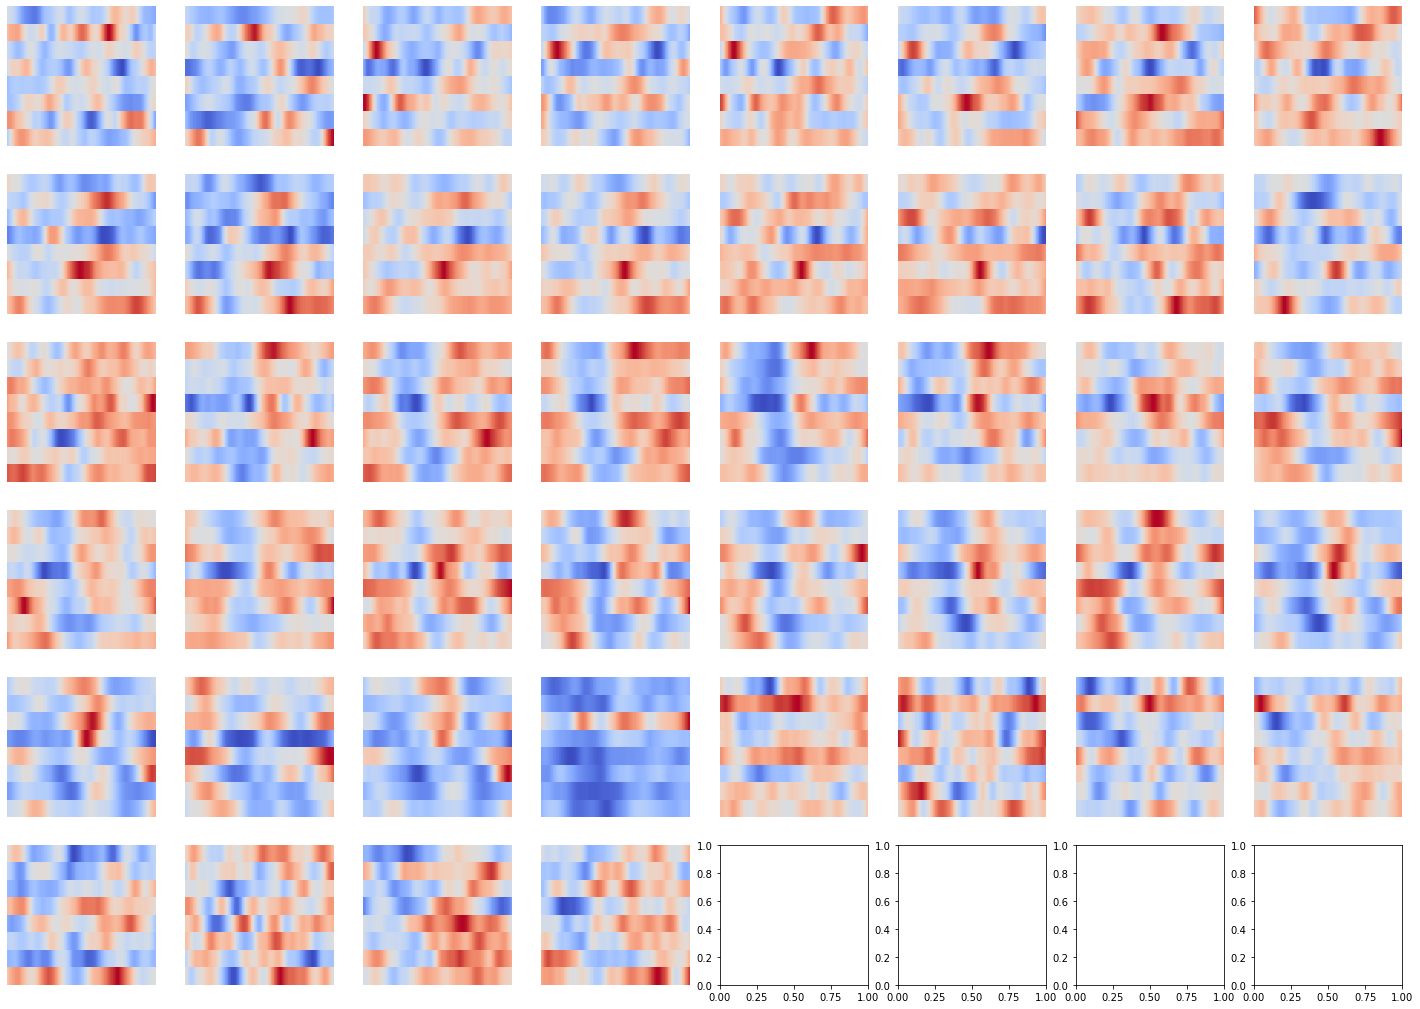

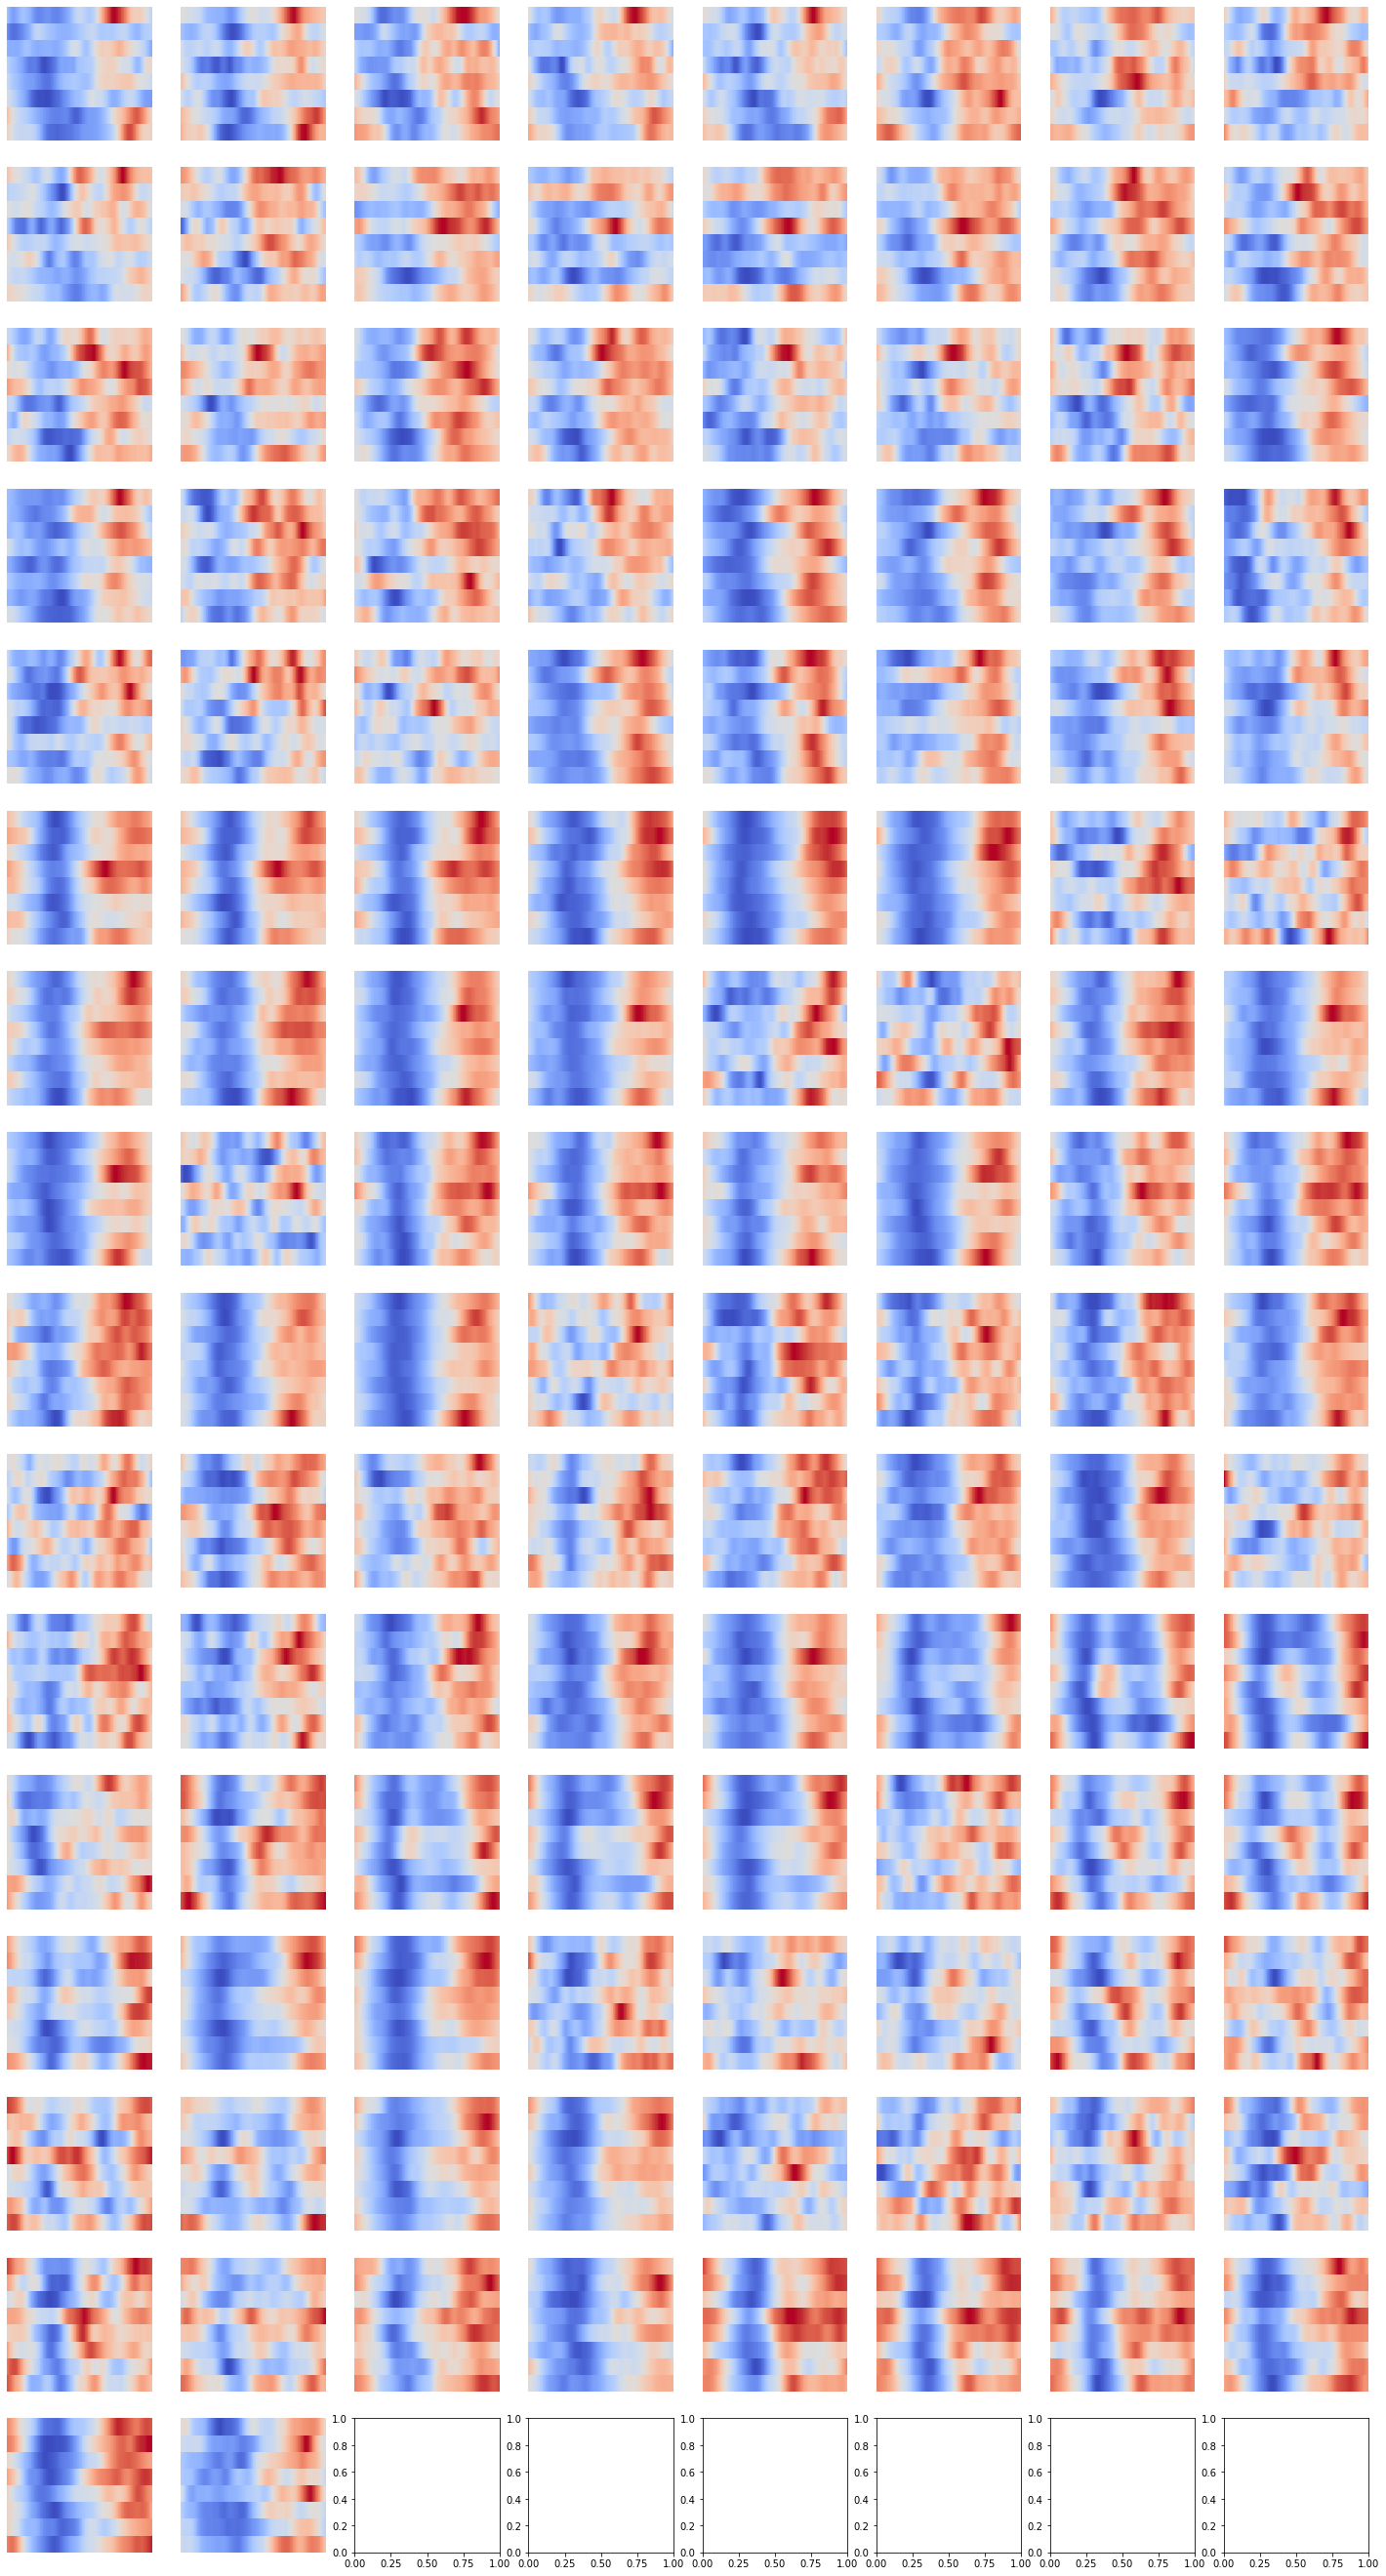

In [147]:
def plot_heatmap_kmeans(cluster_label):
    nums_plots = len(np.where(clusters_2==cluster_label)[0])
    fig, axs = plt.subplots(int(nums_plots/8)+1, 8, figsize=(25, int(25/8)*(1+int(nums_plots/8))))
    
    ax = 0 
    
        
    for j,img_temp_2 in enumerate(images_2):
        if clusters_2[j] == cluster_label:
            sns.heatmap(img_temp_2,ax=axs.flatten()[ax],yticklabels=[],xticklabels=[],cmap='coolwarm',cbar=False)
            ax += 1
for i in range(3):
    plot_heatmap_kmeans(i)